In [20]:
import yfinance as yf


In [24]:
# Create an object for Tesla
tesla = yf.Ticker("TSLA")
# Obtain the stock data with the maximum period
tesla_data = tesla.history(period="max")
# Reset the index of the DataFrame
tesla_data_reset = tesla_data.reset_index()
# Display the first five rows of the DataFrame
tesla_data_reset.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [50]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text
soup = BeautifulSoup(html_data, 'html.parser')
tables = soup.find_all('table')
tesla_revenue_table = None
for table in tables:
    if 'Tesla Quarterly Revenue' in table.text:
        tesla_revenue_table = table
        break
dates = []
revenues = []

# Step 6: Extract rows
rows = tesla_revenue_table.find_all('tr')
for row in rows[1:]:  # Skip the header row
    cells = row.find_all('td')
    if len(cells) >= 2:
        date = cells[0].text.strip()
        revenue = cells[1].text.strip()
        
        # Clean revenue data
        revenue = revenue.replace('$', '').replace(',', '')

        # Append data to lists
        dates.append(date)
        revenues.append(revenue)

# Create DataFrame from lists
tesla_revenue = pd.DataFrame({
    "Date": dates,
    "Revenue": revenues
})

tesla_revenue.tail()

,Date,Revenue
49,2010-06-30,28
50,2010-03-31,21
51,2009-12-31,
52,2009-09-30,46
53,2009-06-30,27


In [36]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data_reset = gme_data.reset_index()
gme_data_reset.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [58]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text

soup = BeautifulSoup(html_data_2, 'html.parser')  # You can also use 'html5lib'

tables = soup.find_all('table')
gme_revenue_table = None
for table in tables:
    if 'GameStop Quarterly Revenue' in table.text:
        gme_revenue_table = table
        break

if gme_revenue_table is None:
    raise ValueError("GameStop Revenue table not found")

dates = []
revenues = []

# Step 5: Extract rows
rows = gme_revenue_table.find_all('tr')
for row in rows[1:]:  
    cells = row.find_all('td')
    if len(cells) >= 2:
        date = cells[0].text.strip()
        revenue = cells[1].text.strip()
        
        revenue = revenue.replace('$', '').replace(',', '')

        dates.append(date)
        revenues.append(revenue)

gme_revenue = pd.DataFrame({
    "Date": dates,
    "Revenue": revenues
})

gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [60]:
import matplotlib.pyplot as plt


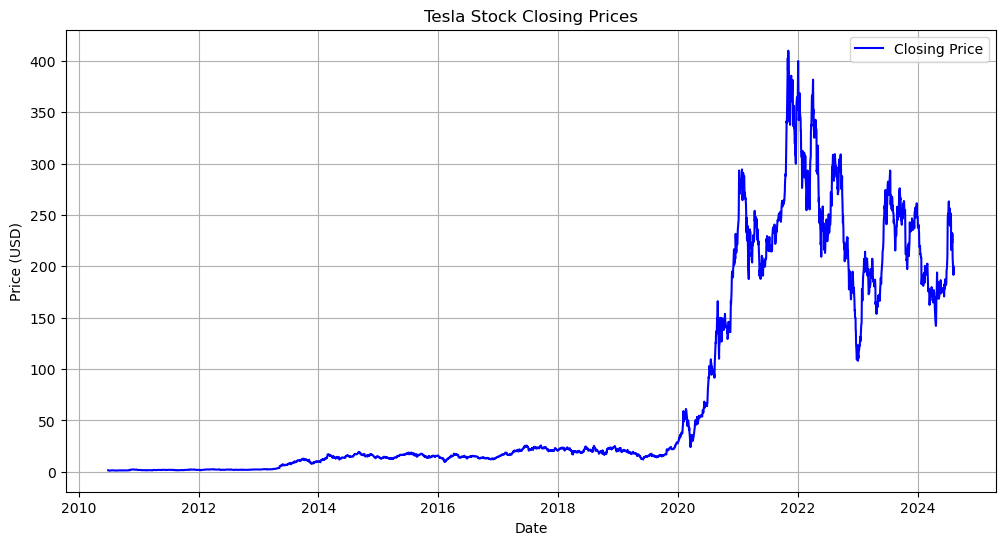

In [62]:
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='Closing Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

make_graph(tesla_data, "Tesla Stock Closing Prices")

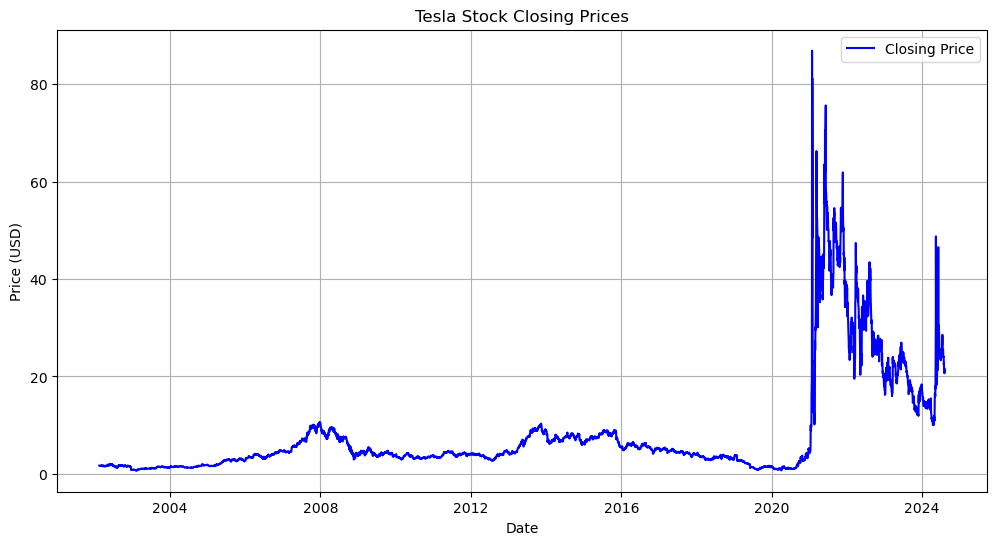

In [64]:
make_graph(gme_data, "Tesla Stock Closing Prices")